<a href="https://colab.research.google.com/github/EndangSupriyadi/Customer_Churn_Analytics/blob/master/Customer_Churn_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer_Churn_Analytics** <br>
dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

Tujuan : Untuk memprediksi potensi customer melakukan churn

# **1. Data Understanding** <br>
**CustomerID**: A unique ID that identifies each customer. <br>
**Gender**: The customer’s gender: Male, Female <br>
**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No <br>
**Partner** : Whether the customer has a partner or not (Yes, No) <br>
**Dependents** : Whether the customer has dependents or not (Yes, No) <br>
**Tenure** : Number of months the customer has stayed with the company <br>
**PhoneService** : Whether the customer has a phone service or not (Yes, No) <br>
**MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service) <br>
**InternetService** : Customer’s internet service provider (DSL, Fiber optic, No) <br>
**OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service) <br>
**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No <br>
**Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No <br>
**Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No <br>
**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service. <br>
**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service. <br>
**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year. <br>
**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No <br>
**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check <br>
**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company. <br>
**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above. <br>
**Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.








# **2. Data Loading**
Menyiapkan library apa saja yang akan digunakan dan membaca dataset

In [1]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset di google drive
url = '/content/drive/MyDrive/dataset/Telco-Customer-Churn.csv'
telco = pd.read_csv(url)
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Note!**
 - Dataset terdiri dari 21 kolom dan 7043 baris dengan berbagai jenis type data.

# **3. Exploratory Data Analyst (EDA)**
mengenai lebih jauh isi dari dataset

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Note!** <br>
Dataset ini ada banyak feature dengan type object nantinya akan dilakukan Encoding dan On Hot Encoding

In [4]:
# Melihat feature target
telco['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


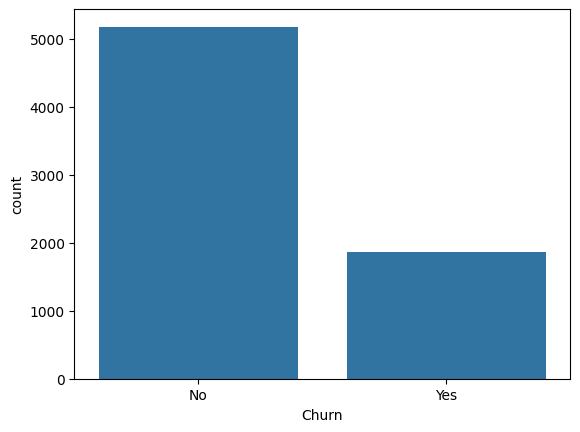

In [5]:
# grafik value_counts
sns.countplot(x='Churn', data=telco)
plt.show()

**Note!** <br>
Jumlah label imbalanced ini menjadi sebuah tangtangan tapi difokuskan ke label yes untuk mendeteksi potensi kemungkinan churn

In [6]:
# Menjadikan nilai kosong
telco= telco.replace(r'^\s*$', np.nan, regex=True)


In [7]:
telco.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# **4. Data Preparation**

In [8]:
# Mengganti No Internet Service dan No Phone Service masuk kategori No
# Bersihkan "No internet service" → "No"
cols_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_internet:
    telco[col] = telco[col].replace("No internet service", "No")

# Bersihkan "No phone service" → "No"
telco['MultipleLines'] = telco['MultipleLines'].replace("No phone service", "No")
telco



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


terdapat nilai kosong di TotalCharges sebanyak 11

In [9]:
# Hapus Nan di kolom TotalCharges
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
telco = telco.dropna(subset=['TotalCharges'])

In [10]:
telco.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
# Pisahkan fitur kategori & numerik (sesuai gambar yang Anda berikan)
categorical_features = [
    'customerID','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

In [13]:
from sklearn.preprocessing import OrdinalEncoder

# Label Encoding untuk Semua Fitur Kategorikal
telco_corr = telco.copy()

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

telco_corr[categorical_features] = encoder.fit_transform(
    telco_corr[categorical_features]
)


In [14]:
telco_corr[target] = telco_corr[target].map({"No": 0, "Yes": 1})


In [15]:
telco_corr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,3953.0,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,2558.0,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,5524.0,1.0,0.0,0.0,0.0,45,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,6500.0,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843.0,1.0,0.0,1.0,1.0,24,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,1990.50,0
7039,1524.0,0.0,0.0,1.0,1.0,72,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,7362.90,0
7040,3358.0,0.0,0.0,1.0,1.0,11,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0
7041,5923.0,1.0,1.0,1.0,0.0,4,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1


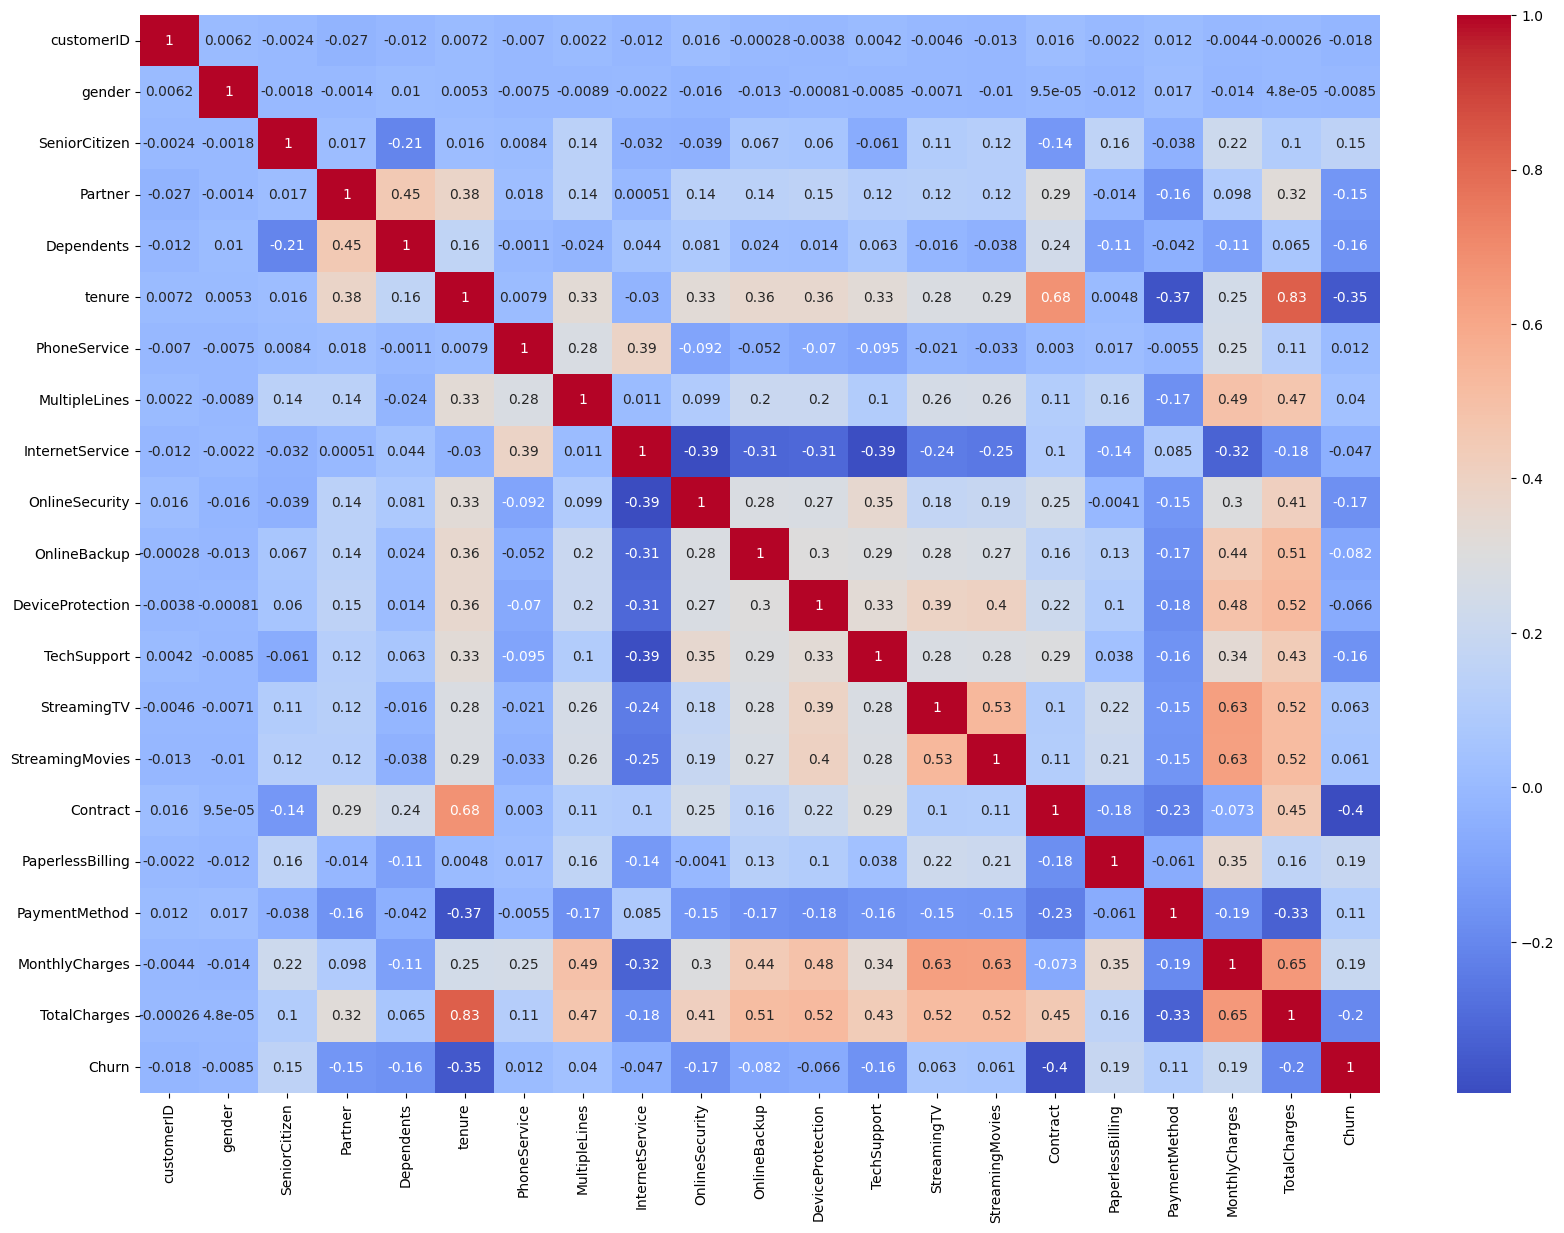

In [16]:
plt.figure(figsize=(20,14))
sns.heatmap(telco_corr.corr(), annot=True, cmap="coolwarm")
plt.show()

In [17]:
# 1. Hitung korelasi pada data yang sudah di-encode
telco_corr = telco_corr.corr()

# 2. Ambil korelasi fitur terhadap target
corr_target = telco_corr['Churn'].abs().sort_values(ascending=False)

print("Korelasi terhadap Churn:")
print(corr_target)

# 3. Pilih fitur dengan korelasi ≥ 0.1
selected_features = corr_target[corr_target >= 0.1].index.tolist()

# 4. Hapus target jika ikut terpilih
if 'Churn' in selected_features:
    selected_features.remove('Churn')

print("\nFitur terpilih (corr >= 0.1):")
print(selected_features)

# 5. Buat dataset baru berisi fitur terpilih + target
telco_selected = telco_corr[selected_features + ['Churn']]

print("\nShape dataset baru:", telco_selected.shape)


Korelasi terhadap Churn:
Churn               1.000000
Contract            0.396150
tenure              0.354049
TotalCharges        0.199484
MonthlyCharges      0.192858
PaperlessBilling    0.191454
OnlineSecurity      0.171270
TechSupport         0.164716
Dependents          0.163128
SeniorCitizen       0.150541
Partner             0.149982
PaymentMethod       0.107852
OnlineBackup        0.082307
DeviceProtection    0.066193
StreamingTV         0.063254
StreamingMovies     0.060860
InternetService     0.047097
MultipleLines       0.040033
customerID          0.017858
PhoneService        0.011691
gender              0.008545
Name: Churn, dtype: float64

Fitur terpilih (corr >= 0.1):
['Contract', 'tenure', 'TotalCharges', 'MonthlyCharges', 'PaperlessBilling', 'OnlineSecurity', 'TechSupport', 'Dependents', 'SeniorCitizen', 'Partner', 'PaymentMethod']

Shape dataset baru: (21, 12)


In [18]:
# Fitur yang dipilih
selected_features = [
    'Contract', 'tenure', 'TotalCharges', 'MonthlyCharges', 'PaperlessBilling', 'OnlineSecurity', 'TechSupport', 'Dependents', 'SeniorCitizen', 'Partner', 'PaymentMethod', 'Churn'
]


In [19]:
# Dataset asli = telco
df = telco.copy()

# Tambahkan target
selected_features_with_target = selected_features

# Ambil hanya fitur terpilih + target
df_selected = df[selected_features_with_target].copy()

df_selected.head()


,Contract,tenure,TotalCharges,MonthlyCharges,PaperlessBilling,OnlineSecurity,TechSupport,Dependents,SeniorCitizen,Partner,PaymentMethod,Churn
0,Month-to-month,1,29.85,29.85,Yes,No,No,No,0,Yes,Electronic check,No
1,One year,34,1889.50,56.95,No,Yes,No,No,0,No,Mailed check,No
2,Month-to-month,2,108.15,53.85,Yes,Yes,No,No,0,No,Mailed check,Yes
3,One year,45,1840.75,42.30,No,Yes,Yes,No,0,No,Bank transfer (automatic),No
4,Month-to-month,2,151.65,70.70,Yes,No,No,No,0,No,Electronic check,Yes


In [20]:
# Identifikasi Fitur Kategori & Numerik Setelah Seleksi
categorical_features = [
    'Contract', 'PaperlessBilling','OnlineSecurity', 'TechSupport', 'Dependents', 'SeniorCitizen', 'Partner', 'PaymentMethod', 'Churn'
]

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [21]:
df_ohe = pd.get_dummies(df_selected, columns=categorical_features, drop_first=True)

df_ohe.head()


,tenure,TotalCharges,MonthlyCharges,Contract_One year,Contract_Two year,PaperlessBilling_Yes,OnlineSecurity_Yes,TechSupport_Yes,Dependents_Yes,SeniorCitizen_1,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,False,False,True,False,True,False,False
1,34,1889.50,56.95,True,False,False,True,False,False,False,False,False,False,True,False
2,2,108.15,53.85,False,False,True,True,False,False,False,False,False,False,True,True
3,45,1840.75,42.30,True,False,False,True,True,False,False,False,False,False,False,False
4,2,151.65,70.70,False,False,True,False,False,False,False,False,False,True,False,True


In [22]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   TotalCharges                           7032 non-null   float64
 2   MonthlyCharges                         7032 non-null   float64
 3   Contract_One year                      7032 non-null   bool   
 4   Contract_Two year                      7032 non-null   bool   
 5   PaperlessBilling_Yes                   7032 non-null   bool   
 6   OnlineSecurity_Yes                     7032 non-null   bool   
 7   TechSupport_Yes                        7032 non-null   bool   
 8   Dependents_Yes                         7032 non-null   bool   
 9   SeniorCitizen_1                        7032 non-null   bool   
 10  Partner_Yes                            7032 non-null   bool   
 11  PaymentMe

In [23]:

# Split Data

X = df_ohe.drop('Churn_Yes', axis=1)
y = df_ohe['Churn_Yes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [24]:
# Handle Data Imbalance
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train, y_train)

In [25]:
print("Jumlah data sebelum SMOTE: ", y_train.value_counts())
print("Jumlah data setelah SMOTE: ", y_train_smote.value_counts())

Jumlah data sebelum SMOTE:  Churn_Yes
False    4130
True     1495
Name: count, dtype: int64
Jumlah data setelah SMOTE:  Churn_Yes
False    3740
True     3740
Name: count, dtype: int64


In [26]:
# Gabungkan data train
train_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
train_df['Churn_Yes'] = y_train_smote

# Gabungkan data test
test_df = pd.DataFrame(X_test, columns=X_test.columns)
test_df['Churn_Yes'] = y_test


In [27]:
# Pisahkan data
X_train_final = train_df.drop('Churn_Yes', axis=1)
y_train_final = train_df['Churn_Yes']

X_test_final = test_df.drop('Churn_Yes', axis=1)
y_test_final = test_df['Churn_Yes']

In [28]:
rf_model_1 = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    criterion='gini',
    class_weight='balanced',
    random_state=42
)


In [29]:
# Train Model
rf_model_1.fit(X_train_final, y_train_final)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [30]:
y_pred_model_1 = rf_model_1.predict(X_test_final)


In [31]:
# Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test_final, y_pred_model_1))
print("\nClassification Report:\n", classification_report(y_test_final, y_pred_model_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_final, y_pred_model_1))

Accuracy: 0.7697228144989339

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.80      0.84      1033
        True       0.55      0.70      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.77      0.78      1407


Confusion Matrix:
 [[823 210]
 [114 260]]


In [32]:
rf_model_2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='entropy',
    class_weight='balanced',
    random_state=42
)


In [33]:
rf_model_2.fit(X_train_final, y_train_final)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [34]:
y_pred_model_2 = rf_model_2.predict(X_test_final)


In [35]:


# Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test_final, y_pred_model_2))
print("\nClassification Report:\n", classification_report(y_test_final, y_pred_model_2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_final, y_pred_model_2))

Accuracy: 0.7775408670931059

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.82      0.84      1033
        True       0.57      0.67      0.62       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407


Confusion Matrix:
 [[842 191]
 [122 252]]


# Kesimpulan Akhir
Rekomendasi Model Terbaik adalah Model 1.

Alasan Utama:

1. Prioritas Recall yang Lebih Tinggi: Model 1 memiliki Recall 0.70 (versus 0.67 pada Model 2) dan False Negative (FN) yang lebih rendah (114). Dalam pencegahan churn, tujuannya adalah meminimalkan FN, karena setiap pelanggan churn yang terlewatkan (FN) berarti kerugian pendapatan yang langsung dan signifikan bagi perusahaan.

2. Keseimbangan yang Dapat Diterima: Meskipun Model 2 memiliki Precision yang sedikit lebih tinggi (menghemat 19 kasus FP), peningkatan 8 kasus FN pada Model 2 kemungkinan besar lebih merugikan secara finansial daripada penghematan biaya insentif tersebut.

Oleh karena itu, Model 1 adalah model yang lebih baik untuk memitigasi risiko kerugian akibat churn karena lebih efektif dalam mengidentifikasi pelanggan yang benar-benar membutuhkan intervensi penyelamatan.